In [1]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian

torch.set_default_tensor_type(torch.DoubleTensor)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0.,0.])
o2 = torch.tensor([10.,0.])
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [[0,5], [10,-5]]
target = mm.multipleCircles(origin_target, radius, nb_pts)

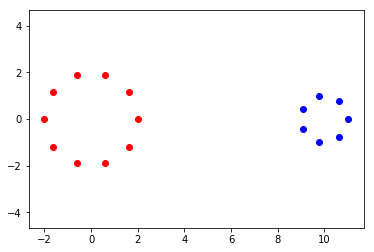

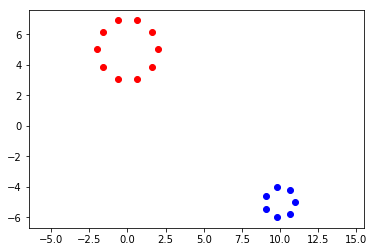

In [3]:
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [4]:
# Defining the deformation modules
sigma1 = 3
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 3
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
sigma_bg = 0.1
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [6]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [7]:
my_model = dm.models.ModelMultishapePointsRegistration(source, [trans1, trans2], sigma_bg,  dm.attachement.L2NormAttachement_multi(), constr_Id)
costs = my_model.fit(target, lr=1e-4, l=50., max_iter=200, log_interval=5)

constraints___________________
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<CatBackward>)
It: 0, deformation cost: 0.000000, attach: 790.569415. Total cost: 790.569415
constraints___________________
tensor([[ 6.5835e-26, -3.1679e-19],
        [ 5.2910e-26, -3.1679e-19],
        [ 1.9791e-26, -3.2187e-19],
        [-2.0700e-26, -3.1171e-19],
        [-5.3011e-26, -3.0832e-19],
        [-6.5835e-26, -3.1848e-19],
        [-5.3617e-26, -3.2187e-19],
        [-1.9236e-26, -3.1848e-19],
        [ 2.0397e-26, -3.1510e-19],
        [ 5.2910e-26, -3.1848e-19],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0

constraints___________________
tensor([[ 7.6475e-08,  6.8059e-07],
        [ 5.4490e-08,  7.1909e-07],
        [ 1.9098e-08,  7.3772e-07],
        [-1.9098e-08,  7.3772e-07],
        [-5.4490e-08,  7.1909e-07],
        [-7.6475e-08,  6.8059e-07],
        [-6.9113e-08,  6.3540e-07],
        [-2.8021e-08,  6.0647e-07],
        [ 2.8021e-08,  6.0647e-07],
        [ 6.9113e-08,  6.3540e-07],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 8.9202e-08,  7.9904e-07],
        [ 6.3221e-08,  8.4542e-07],
        [ 2.2056e-08,  8.6835e-07],
        [-2.2056e-08,  8.6835e-07],
        [-6.3221e-08,  8.4542e-07],
        [-8.9202e-08,  7.9904e-07],
        [-8.0855e-08,  7.4596e-07],
        [-3.2805e-08,  7.1290e-07],
        [ 3.28

constraints___________________
tensor([[ 3.0964e-07,  2.8924e-06],
        [ 2.1447e-07,  3.0526e-06],
        [ 7.3837e-08,  3.1173e-06],
        [-7.3733e-08,  3.1173e-06],
        [-2.1437e-07,  3.0526e-06],
        [-3.0953e-07,  2.8924e-06],
        [-2.8578e-07,  2.6987e-06],
        [-1.1664e-07,  2.5884e-06],
        [ 1.1675e-07,  2.5884e-06],
        [ 2.8588e-07,  2.6987e-06],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 3.3693e-07,  3.1302e-06],
        [ 2.3386e-07,  3.2967e-06],
        [ 8.0647e-08,  3.3576e-06],
        [-8.0953e-08,  3.3576e-06],
        [-2.3417e-07,  3.2967e-06],
        [-3.3724e-07,  3.1302e-06],
        [-3.1137e-07,  2.9191e-06],
        [-1.2729e-07,  2.7958e-06],
        [ 1.26

constraints___________________
tensor([[ 7.0523e-07,  6.7487e-06],
        [ 4.9351e-07,  7.1182e-06],
        [ 1.7398e-07,  7.2303e-06],
        [-1.6736e-07,  7.2303e-06],
        [-4.8686e-07,  7.1182e-06],
        [-6.9857e-07,  6.7487e-06],
        [-6.4124e-07,  6.2754e-06],
        [-2.5777e-07,  6.0382e-06],
        [ 2.6484e-07,  6.0382e-06],
        [ 6.4804e-07,  6.2754e-06],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 7.4773e-07,  7.1102e-06],
        [ 5.2535e-07,  7.4878e-06],
        [ 1.8667e-07,  7.5893e-06],
        [-1.7727e-07,  7.5893e-06],
        [-5.1589e-07,  7.4878e-06],
        [-7.3826e-07,  7.1101e-06],
        [-6.7671e-07,  6.6074e-06],
        [-2.7113e-07,  6.3508e-06],
        [ 2.81

constraints___________________
tensor([[ 1.1750e-06,  1.1566e-05],
        [ 8.4296e-07,  1.2208e-05],
        [ 3.0414e-07,  1.2335e-05],
        [-2.9360e-07,  1.2335e-05],
        [-8.3233e-07,  1.2208e-05],
        [-1.1644e-06,  1.1566e-05],
        [-1.0479e-06,  1.0698e-05],
        [-4.1405e-07,  1.0333e-05],
        [ 4.2539e-07,  1.0333e-05],
        [ 1.0587e-06,  1.0698e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 1.2328e-06,  1.2048e-05],
        [ 8.8914e-07,  1.2690e-05],
        [ 3.2245e-07,  1.2783e-05],
        [-3.1167e-07,  1.2783e-05],
        [-8.7824e-07,  1.2690e-05],
        [-1.2220e-06,  1.2048e-05],
        [-1.0971e-06,  1.1133e-05],
        [-4.3309e-07,  1.0736e-05],
        [ 4.44

constraints___________________
tensor([[ 1.8069e-06,  1.8313e-05],
        [ 1.3647e-06,  1.9320e-05],
        [ 5.1357e-07,  1.9309e-05],
        [-5.0045e-07,  1.9309e-05],
        [-1.3513e-06,  1.9320e-05],
        [-1.7937e-06,  1.8313e-05],
        [-1.5463e-06,  1.6764e-05],
        [-5.8963e-07,  1.6252e-05],
        [ 6.0392e-07,  1.6252e-05],
        [ 1.5597e-06,  1.6764e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 1.8425e-06,  1.8875e-05],
        [ 1.3967e-06,  1.9946e-05],
        [ 5.2689e-07,  1.9955e-05],
        [-5.1361e-07,  1.9955e-05],
        [-1.3832e-06,  1.9946e-05],
        [-1.8291e-06,  1.8875e-05],
        [-1.5690e-06,  1.7265e-05],
        [-5.9520e-07,  1.6770e-05],
        [ 6.09

constraints___________________
tensor([[ 2.4453e-06,  2.6029e-05],
        [ 1.9874e-06,  2.7547e-05],
        [ 7.8916e-07,  2.7223e-05],
        [-7.7377e-07,  2.7223e-05],
        [-1.9716e-06,  2.7547e-05],
        [-2.4299e-06,  2.6029e-05],
        [-1.9444e-06,  2.3465e-05],
        [-6.9061e-07,  2.2916e-05],
        [ 7.0765e-07,  2.2916e-05],
        [ 1.9600e-06,  2.3465e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 2.4920e-06,  2.6734e-05],
        [ 2.0404e-06,  2.8320e-05],
        [ 8.1416e-07,  2.7974e-05],
        [-7.9862e-07,  2.7974e-05],
        [-2.0245e-06,  2.8320e-05],
        [-2.4764e-06,  2.6734e-05],
        [-1.9640e-06,  2.4064e-05],
        [-6.9093e-07,  2.3530e-05],
        [ 7.08

constraints___________________
tensor([[ 3.1955e-06,  3.6492e-05],
        [ 2.9330e-06,  3.8859e-05],
        [ 1.2574e-06,  3.7707e-05],
        [-1.2397e-06,  3.7707e-05],
        [-2.9146e-06,  3.8859e-05],
        [-3.1778e-06,  3.6492e-05],
        [-2.1742e-06,  3.1995e-05],
        [-6.3937e-07,  3.1569e-05],
        [ 6.5960e-07,  3.1569e-05],
        [ 2.1918e-06,  3.1995e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 3.2614e-06,  3.7425e-05],
        [ 3.0277e-06,  3.9869e-05],
        [ 1.3066e-06,  3.8610e-05],
        [-1.2887e-06,  3.8610e-05],
        [-3.0090e-06,  3.9869e-05],
        [-3.2435e-06,  3.7425e-05],
        [-2.1816e-06,  3.2719e-05],
        [-6.2602e-07,  3.2304e-05],
        [ 6.46

constraints___________________
tensor([[ 4.0172e-06,  4.9354e-05],
        [ 4.3046e-06,  5.3083e-05],
        [ 2.0006e-06,  5.0295e-05],
        [-1.9809e-06,  5.0295e-05],
        [-4.2836e-06,  5.3083e-05],
        [-3.9975e-06,  4.9355e-05],
        [-2.0324e-06,  4.1462e-05],
        [-3.0777e-07,  4.1313e-05],
        [ 3.3135e-07,  4.1313e-05],
        [ 2.0517e-06,  4.1462e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 4.0998e-06,  5.0648e-05],
        [ 4.4560e-06,  5.4533e-05],
        [ 2.0849e-06,  5.1551e-05],
        [-2.0648e-06,  5.1551e-05],
        [-4.4347e-06,  5.4533e-05],
        [-4.0800e-06,  5.0648e-05],
        [-2.0011e-06,  4.2355e-05],
        [-2.6292e-07,  4.2230e-05],
        [ 2.86

constraints___________________
tensor([[ 5.4880e-06,  7.0933e-05],
        [ 7.0363e-06,  7.7820e-05],
        [ 3.5338e-06,  7.1604e-05],
        [-3.5118e-06,  7.1604e-05],
        [-7.0122e-06,  7.7820e-05],
        [-5.4666e-06,  7.0932e-05],
        [-1.3655e-06,  5.5350e-05],
        [ 5.5525e-07,  5.5358e-05],
        [-5.2755e-07,  5.5358e-05],
        [ 1.3858e-06,  5.5350e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 5.6624e-06,  7.3197e-05],
        [ 7.3439e-06,  8.0469e-05],
        [ 3.7055e-06,  7.3889e-05],
        [-3.6835e-06,  7.3889e-05],
        [-7.3196e-06,  8.0469e-05],
        [-5.6409e-06,  7.3197e-05],
        [-1.2979e-06,  5.6716e-05],
        [ 6.4799e-07,  5.6697e-05],
        [-6.19

constraints___________________
tensor([[ 9.0313e-06,  1.0960e-04],
        [ 1.2529e-05,  1.2383e-04],
        [ 6.5260e-06,  1.1195e-04],
        [-6.5026e-06,  1.1195e-04],
        [-1.2502e-05,  1.2383e-04],
        [-9.0088e-06,  1.0960e-04],
        [-7.4609e-07,  7.7773e-05],
        [ 1.8792e-06,  7.6112e-05],
        [-1.8462e-06,  7.6112e-05],
        [ 7.6631e-07,  7.7773e-05],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 9.5466e-06,  1.1445e-04],
        [ 1.3236e-05,  1.2968e-04],
        [ 6.9002e-06,  1.1718e-04],
        [-6.8768e-06,  1.1718e-04],
        [-1.3208e-05,  1.2968e-04],
        [-9.5240e-06,  1.1445e-04],
        [-7.5034e-07,  8.0514e-05],
        [ 2.0030e-06,  7.8496e-05],
        [-1.96

constraints___________________
tensor([[ 2.2169e-05,  2.1532e-04],
        [ 2.8017e-05,  2.5317e-04],
        [ 1.4366e-05,  2.3125e-04],
        [-1.4353e-05,  2.3125e-04],
        [-2.8000e-05,  2.5317e-04],
        [-2.2157e-05,  2.1532e-04],
        [-3.5533e-06,  1.3746e-04],
        [ 3.0942e-06,  1.2394e-04],
        [-3.0708e-06,  1.2394e-04],
        [ 3.5628e-06,  1.3746e-04],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 2.4112e-05,  2.2934e-04],
        [ 3.0076e-05,  2.7049e-04],
        [ 1.5375e-05,  2.4762e-04],
        [-1.5334e-05,  2.4762e-04],
        [-3.0023e-05,  2.7049e-04],
        [-2.4074e-05,  2.2934e-04],
        [-4.2040e-06,  1.4541e-04],
        [ 3.1194e-06,  1.2991e-04],
        [-3.05

constraints___________________
tensor([[ 6.6225e-05,  5.1290e-04],
        [ 7.0365e-05,  6.2420e-04],
        [ 3.4193e-05,  5.9017e-04],
        [-3.4175e-05,  5.9017e-04],
        [-7.0336e-05,  6.2420e-04],
        [-6.6210e-05,  5.1290e-04],
        [-2.3129e-05,  3.0773e-04],
        [ 4.2263e-08,  2.4432e-04],
        [ 4.1087e-09,  2.4432e-04],
        [ 2.3138e-05,  3.0773e-04],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 7.3045e-05,  5.5709e-04],
        [ 7.6508e-05,  6.7974e-04],
        [ 3.6982e-05,  6.4479e-04],
        [-3.6959e-05,  6.4479e-04],
        [-7.6471e-05,  6.7974e-04],
        [-7.3026e-05,  5.5709e-04],
        [-2.6585e-05,  3.3314e-04],
        [-7.1462e-07,  2.6152e-04],
        [ 7.73

constraints___________________
tensor([[ 2.5306e-04,  1.7107e-03],
        [ 2.2882e-04,  2.1518e-03],
        [ 1.0383e-04,  2.1180e-03],
        [-1.0383e-04,  2.1180e-03],
        [-2.2879e-04,  2.1517e-03],
        [-2.5306e-04,  1.7107e-03],
        [-1.2675e-04,  9.9141e-04],
        [-2.6046e-05,  6.8474e-04],
        [ 2.6120e-05,  6.8474e-04],
        [ 1.2673e-04,  9.9141e-04],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 2.8227e-04,  1.9002e-03],
        [ 2.5280e-04,  2.3967e-03],
        [ 1.1417e-04,  2.3654e-03],
        [-1.1417e-04,  2.3654e-03],
        [-2.5277e-04,  2.3967e-03],
        [-2.8227e-04,  1.9002e-03],
        [-1.4352e-04,  1.0980e-03],
        [-3.0344e-05,  7.5094e-04],
        [ 3.04

constraints___________________
tensor([[ 0.0011,  0.0078],
        [ 0.0009,  0.0103],
        [ 0.0004,  0.0104],
        [-0.0004,  0.0104],
        [-0.0009,  0.0103],
        [-0.0011,  0.0078],
        [-0.0006,  0.0042],
        [-0.0001,  0.0025],
        [ 0.0001,  0.0025],
        [ 0.0006,  0.0042],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 0.0012,  0.0088],
        [ 0.0010,  0.0117],
        [ 0.0005,  0.0119],
        [-0.0005,  0.0119],
        [-0.0010,  0.0117],
        [-0.0012,  0.0088],
        [-0.0007,  0.0047],
        [-0.0001,  0.0027],
        [ 0.0001,  0.0027],
        [ 0.0007,  0.0047],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000, 

constraints___________________
tensor([[ 2.9342e-03,  2.4904e-02],
        [ 2.6487e-03,  3.5844e-02],
        [ 1.1834e-03,  3.6864e-02],
        [-1.1838e-03,  3.6864e-02],
        [-2.6491e-03,  3.5844e-02],
        [-2.9345e-03,  2.4904e-02],
        [-1.3534e-03,  1.0701e-02],
        [-1.0254e-05,  4.3944e-03],
        [ 1.0405e-05,  4.3944e-03],
        [ 1.3532e-03,  1.0701e-02],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
constraints___________________
tensor([[ 3.0290e-03,  2.5949e-02],
        [ 2.7522e-03,  3.7524e-02],
        [ 1.2316e-03,  3.8622e-02],
        [-1.2321e-03,  3.8622e-02],
        [-2.7525e-03,  3.7524e-02],
        [-3.0293e-03,  2.5949e-02],
        [-1.3826e-03,  1.0978e-02],
        [ 6.0276e-06,  4.3359e-03],
        [-5.87

constraints___________________
tensor([[ 0.0036,  0.0330],
        [ 0.0035,  0.0493],
        [ 0.0016,  0.0510],
        [-0.0016,  0.0510],
        [-0.0035,  0.0493],
        [-0.0036,  0.0330],
        [-0.0016,  0.0124],
        [ 0.0001,  0.0033],
        [-0.0001,  0.0033],
        [ 0.0016,  0.0124],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000]], grad_fn=<CatBackward>)


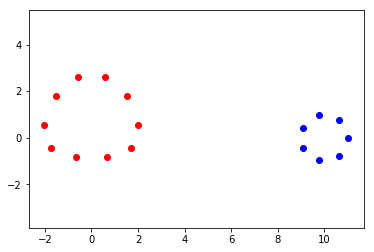

In [8]:
my_model.compute(target)
shot_gd = my_model()

plt.scatter(shot_gd[0].view(-1,2)[:, 0].detach().numpy(),shot_gd[0].view(-1,2)[:, 1].detach().numpy(), c='red')
plt.scatter(shot_gd[1].view(-1,2)[:, 0].detach().numpy(),shot_gd[1].view(-1,2)[:, 1].detach().numpy(), c='blue')
plt.axis('equal')
plt.show()

In [9]:
shot_gd

[tensor([[ 2.0168,  0.5406],
         [ 1.5391,  1.8018],
         [ 0.5665,  2.6159],
         [-0.5664,  2.6159],
         [-1.5390,  1.8018],
         [-2.0168,  0.5406],
         [-1.7177, -0.4594],
         [-0.6759, -0.8418],
         [ 0.6759, -0.8418],
         [ 1.7178, -0.4594]], grad_fn=<ViewBackward>),
 tensor([[11.0000,  0.0000],
         [10.6235,  0.7818],
         [ 9.7775,  0.9749],
         [ 9.0990,  0.4339],
         [ 9.0990, -0.4339],
         [ 9.7775, -0.9749],
         [10.6235, -0.7818]], grad_fn=<ViewBackward>),
 [tensor([[ 2.0168,  0.5406],
          [ 1.5391,  1.8018],
          [ 0.5665,  2.6159],
          [-0.5664,  2.6159],
          [-1.5390,  1.8018],
          [-2.0168,  0.5406],
          [-1.7177, -0.4594],
          [-0.6759, -0.8418],
          [ 0.6759, -0.8418],
          [ 1.7178, -0.4594]], grad_fn=<ViewBackward>),
  tensor([[11.0000,  0.0000],
          [10.6235,  0.7818],
          [ 9.7775,  0.9749],
          [ 9.0990,  0.4339],
         

In [30]:
i = 0
H.module.manifold.gd[2][i].view(-1) - shot_gd[2][i].view(-1)

tensor([ 0.0129, -0.5278,  0.0373, -0.5352,  0.0206, -0.5502, -0.0207, -0.5502,
        -0.0374, -0.5352, -0.0131, -0.5278,  0.0154, -0.5841,  0.0119, -0.6739,
        -0.0120, -0.6739, -0.0155, -0.5841], grad_fn=<SubBackward0>)

In [34]:
my_model.compute(target)

constraints___________________
tensor([[ 3.6363e-04,  2.7376e-03],
        [ 3.5370e-04,  3.4706e-03],
        [ 1.6683e-04,  3.3696e-03],
        [-1.6682e-04,  3.3696e-03],
        [-3.5364e-04,  3.4706e-03],
        [-3.6362e-04,  2.7377e-03],
        [-1.5873e-04,  1.5455e-03],
        [-1.3930e-05,  1.1595e-03],
        [ 1.4128e-05,  1.1595e-03],
        [ 1.5873e-04,  1.5455e-03],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], grad_fn=<CatBackward>)
-------------------------------------------
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
 

In [41]:
modules.manifold.gd[0]

tensor([ 1.9871,  0.5278,  1.5807,  1.7108,  0.5975,  2.4524, -0.5973,  2.4523,
        -1.5806,  1.7108, -1.9869,  0.5278, -1.6334, -0.5915, -0.6299, -1.2282,
         0.6300, -1.2282,  1.6336, -0.5915], grad_fn=<AddBackward0>)

In [42]:
H.module.manifold.gd[0]

tensor([ 1.9871,  0.5278,  1.5807,  1.7108,  0.5975,  2.4524, -0.5973,  2.4523,
        -1.5806,  1.7108, -1.9869,  0.5278, -1.6334, -0.5915, -0.6299, -1.2282,
         0.6300, -1.2282,  1.6336, -0.5915], grad_fn=<AddBackward0>)